In [1]:
# libraries
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# 1 Data
## 1.1 Extract data

 

In [3]:
df = pd.read_csv("realKnownCause/realKnownCause/CPUdata.csv")


## 1.2 Understand data

In [4]:
print(df.head())

       Time  TimeIndex   CPU
0  12:22:05          1  30.9
1  12:22:07          2  30.1
2  12:22:08          3  32.8
3  12:22:09          4  31.1
4  12:22:10          5  47.7


In [5]:
print(df.shape)

(8088, 3)


In [6]:
# check the CPU mean
print(df['CPU'].mean())
print(df.shape)

24.700197823936698
(8088, 3)


<IPython.core.display.Javascript object>


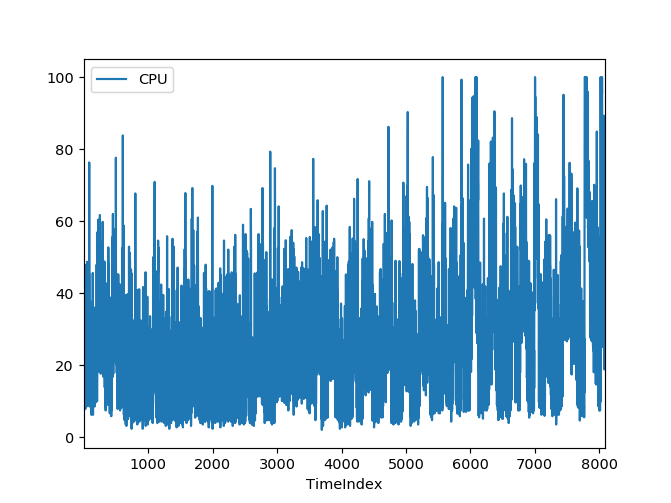

In [7]:
# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['Time'])
# plot the data
df.plot(x='TimeIndex', y='CPU')

## 1.3 Feature engineering
Extracting some useful features

In [8]:
# Take useful feature and standardize them 
data = df[['CPU']]
print(data.shape)
data.head()

(8088, 1)


,CPU
0,30.9
1,30.1
2,32.8
3,31.1
4,47.7


In [9]:
from sklearn.neighbors import LocalOutlierFactor

min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
# lof
model =  LocalOutlierFactor(n_neighbors=50, novelty=True)
data = pd.DataFrame(np_scaled)

test_items = 2374+282+500 ## how many rows for testing
print(data[:data.shape[0]-(test_items-500)].shape)
model.fit(data[:data.shape[0]-(test_items-500)])
full_span = pd.concat([pd.Series([0 for _ in range(data.shape[0]-test_items)]), pd.Series(model.predict(data[data.shape[0]-test_items: data.shape[0]]))], ignore_index=True)
print(data.shape)
print(full_span.shape)
df['anomaly26'] = full_span
df['anomaly26'] = df['anomaly26'].map( {1: 0, -1: 1} )
print(df['anomaly26'].value_counts())

(5432, 1)
(8088, 1)
(8088,)
0.0    2823
1.0     333
Name: anomaly26, dtype: int64


<IPython.core.display.Javascript object>


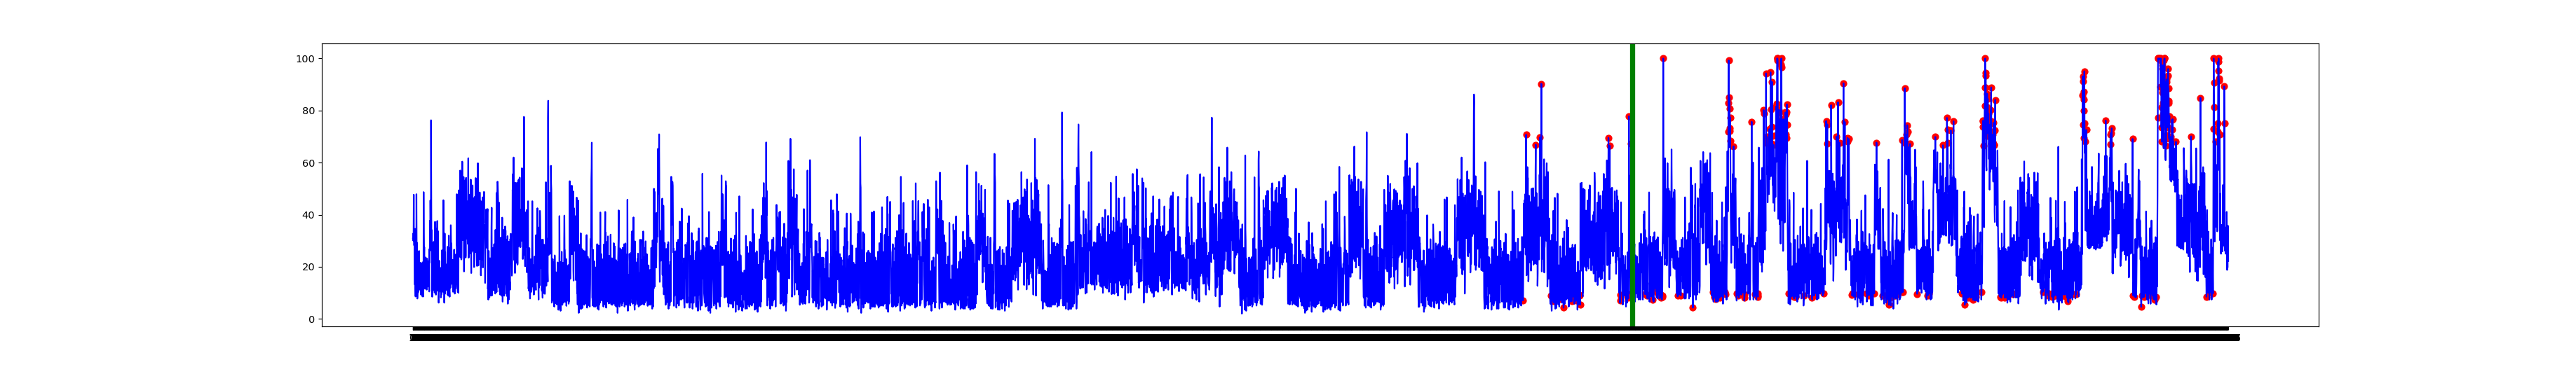

In [10]:
# visualisation of anomaly throughout time (viz 1)
fig, ax = plt.subplots(figsize=(35, 5))
a = df.loc[df['anomaly26'] == 1, ['TimeIndex', 'CPU']] #anomaly
ax.plot(df['TimeIndex'], df['CPU'], color='blue')
ax.scatter(a['TimeIndex'],a['CPU'], color='red')
ax.set_xticks(df.index)
plt.axvline(x=5432,color='g',linewidth='5')
plt.savefig("plot.png")
plt.show()